In [31]:
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.models import model_from_json

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


# Loading Model and test data

In [32]:
#Load preprocessed test data
test = tf.data.Dataset.load("test_ds")

In [33]:
#Load model
def load_model(mod_structure_file, mod_weights_file):  

    # load json and create model
    json_file = open(mod_structure_file, 'r')
    model_structure_json = json_file.read()
    json_file.close()
    model = model_from_json(model_structure_json)

    # load weights into new model
    model.load_weights(mod_weights_file)
    print("Loaded model from disk")
    
    return model

In [34]:
model = load_model('model_structure.json', 'model_weights.h5')

Loaded model from disk


# Model Evaluation

In [35]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print("Model evaluation complete")

1/1 [==============================] - 0s 439ms/step
Model evaluation complete


In [36]:
print(f"Precision: {pre.result().numpy()} \nRecall: {re.result().numpy()} \nAccuracy {acc.result().numpy()}")

Precision: 0.6396591663360596 
Recall: 0.5752298831939697 
Accuracy 0.6032320857048035


# Testing 

In [37]:
def predict_expression(image_file_name):
    img = mpimg.imread(image_file_name)
        
    y_hat = model.predict(tf.expand_dims(img/255,0))
    expressions = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    
    print (f"\nPredicted expression = {expressions[np.argmax(y_hat)]}")
    
    plt.imshow(img, cmap = 'gray')


1/1 [==============================] - 0s 138ms/step

Predicted expression = sad


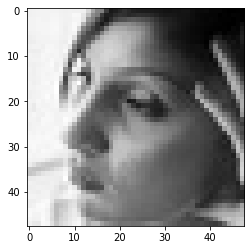

In [38]:
predict_expression("test_img2.jpg")